<a href="https://colab.research.google.com/github/fay-55/My_Projects/blob/main/Data_Cleaning/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scalling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# B. Outlier Handling

### Outlier Handling : InterQuartile Handling

In [ ]:
# untuk plot Q-Q
import scipy.stats as stats

In [ ]:
df_california = pd.read_csv('california_dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
# splitting terlebih dahulu


#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

### Assignment 1.a :
1. Melakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup'] di california_dataset.csv
2. Daftar nama kolom yang Anda cek, kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
3. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

In [ ]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek


### machine learning prep

In [ ]:
train_clfr, test_clfr = train_test_split(df_california, test_size = 0.2, random_state=42)

In [ ]:
test_clfr.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.00000,4128.00000,4128.000000
mean,3.830338,28.764293,5.404059,1.096637,1421.571705,2.965431,35.58671,-119.51936,2.055003
std,1.881515,12.518304,2.794717,0.610196,1114.023136,1.753316,2.13276,1.99447,1.144870
min,0.499900,1.000000,0.846154,0.500000,8.000000,1.263566,32.54000,-124.19000,0.149990
25%,2.548500,18.000000,4.396633,1.004338,781.000000,2.435365,33.93000,-121.69000,1.192750
50%,3.500000,29.000000,5.192764,1.046715,1160.000000,2.823586,34.23000,-118.47000,1.786500
75%,4.645925,37.000000,6.008889,1.095908,1722.000000,3.289374,37.70000,-117.99000,2.630000
max,15.000100,52.000000,132.533333,34.066667,16122.000000,83.171429,41.81000,-114.58000,5.000010


In [ ]:
train_clfr.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
selected_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
df_selected = df_california[selected_columns]
print(df_selected.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  AveOccup
0  8.3252      41.0  6.984127   1.023810  2.555556
1  8.3014      21.0  6.238137   0.971880  2.109842
2  7.2574      52.0  8.288136   1.073446  2.802260
3  5.6431      52.0  5.817352   1.073059  2.547945
4  3.8462      52.0  6.281853   1.081081  2.181467
5  4.0368      52.0  4.761658   1.103627  2.139896
6  3.6591      52.0  4.931907   0.951362  2.128405
7  3.1200      52.0  4.797527   1.061824  1.788253
8  2.0804      42.0  4.294118   1.117647  2.026891
9  3.6912      52.0  4.970588   0.990196  2.172269


In [ ]:
def clfr_plot(df,variable):

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.show()

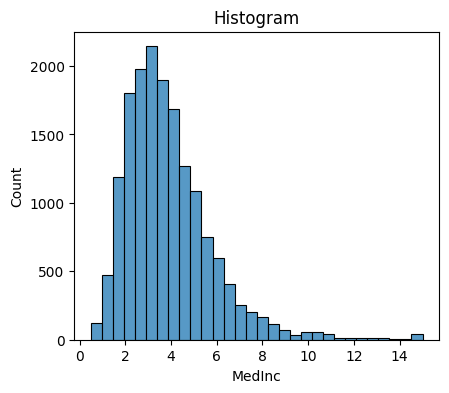

In [ ]:
clfr_plot(train_clfr,'MedInc')

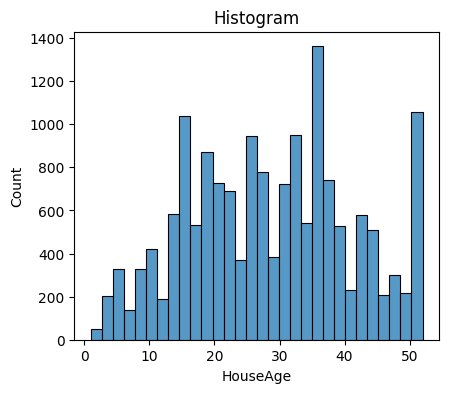

In [ ]:
clfr_plot(train_clfr,'HouseAge')

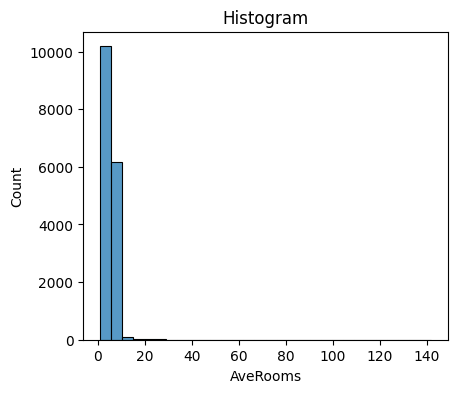

In [ ]:
clfr_plot(train_clfr,'AveRooms')

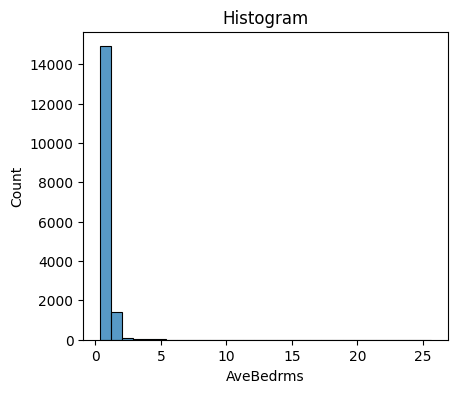

In [ ]:
clfr_plot(train_clfr,'AveBedrms')

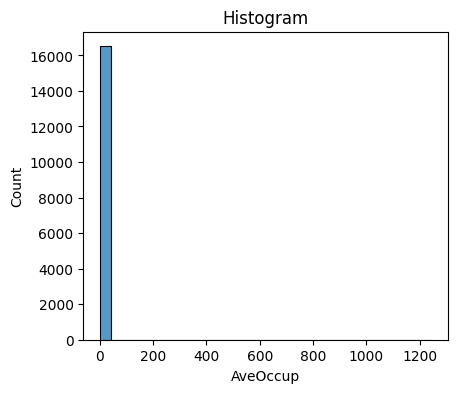

In [ ]:
clfr_plot(train_clfr,'AveOccup')

### untuk exploratory data analysis

In [ ]:
data_clf = df_california.copy()

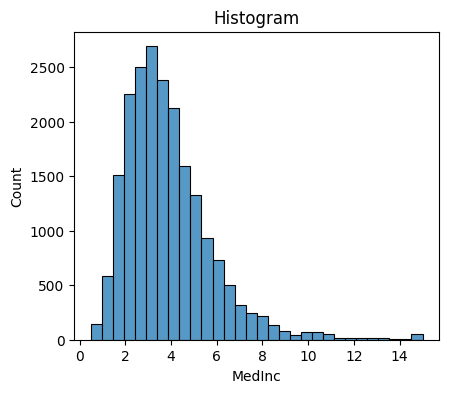

In [ ]:
clfr_plot(data_clf, 'MedInc')

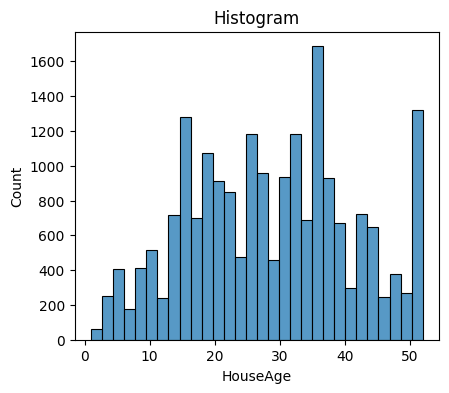

In [ ]:
clfr_plot(data_clf, 'HouseAge')

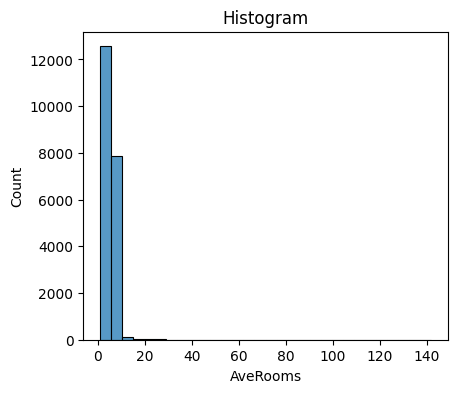

In [ ]:
clfr_plot(data_clf, 'AveRooms')

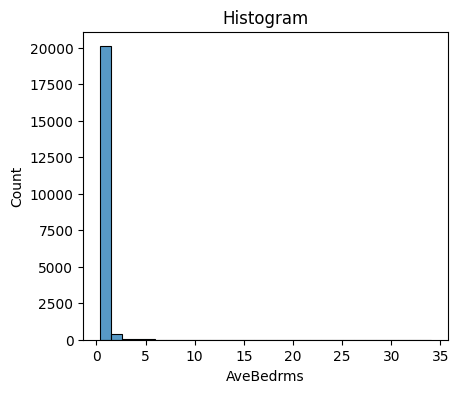

In [ ]:
clfr_plot(data_clf, 'AveBedrms')

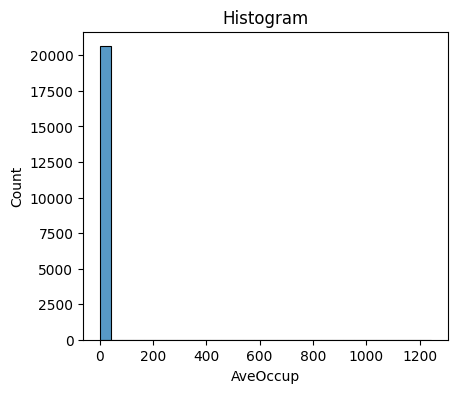

In [ ]:
clfr_plot(data_clf, 'AveOccup')

In [ ]:
selected_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
df_selected = df_california[selected_columns]
print(df_selected.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  AveOccup
0  8.3252      41.0  6.984127   1.023810  2.555556
1  8.3014      21.0  6.238137   0.971880  2.109842
2  7.2574      52.0  8.288136   1.073446  2.802260
3  5.6431      52.0  5.817352   1.073059  2.547945
4  3.8462      52.0  6.281853   1.081081  2.181467
5  4.0368      52.0  4.761658   1.103627  2.139896
6  3.6591      52.0  4.931907   0.951362  2.128405
7  3.1200      52.0  4.797527   1.061824  1.788253
8  2.0804      42.0  4.294118   1.117647  2.026891
9  3.6912      52.0  4.970588   0.990196  2.172269


### Assignment 1.b
1. Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
2. Dan cek distribusinya kembali
3. untuk tujuan machine learning dan juga exploratory data analysis.

In [ ]:
### untuk tujuan machine learning### Assignment 1.b Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
### Dan cek distribusinya kembali


### untuk Machine Learning

In [ ]:
def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
bed_upper_limit, bed_lower_limit = find_outlier_boundary(train_clfr,'AveBedrms')
bed_upper_limit, bed_lower_limit

(1.2411074710635364, 0.8657476648673017)

In [ ]:
train_clfr_bed = train_clfr[(train_clfr['AveBedrms'] <= bed_upper_limit) & (train_clfr['AveBedrms'] >= bed_lower_limit)]

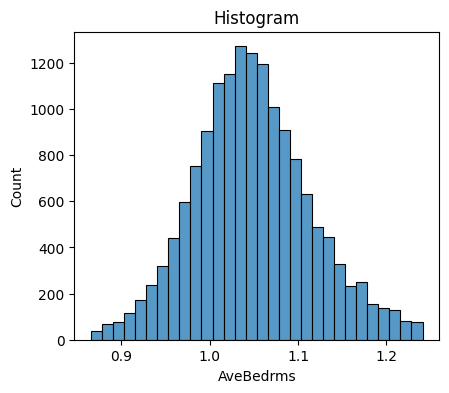

In [ ]:
clfr_plot(train_clfr_bed, 'AveBedrms')

### untuk exploratory data analysis

In [ ]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(data_clf, 'AveOccup')
full_occup_upper_limit, full_occup_lower_limit

(4.5610405893536905, 1.1509614824735064)

In [ ]:
data_clf = data_clf[(data_clf['AveOccup'] <= full_occup_upper_limit) & (data_clf['AveOccup'] >= full_occup_lower_limit)]

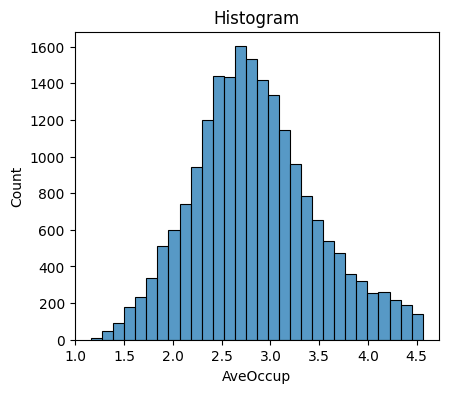

In [ ]:
clfr_plot(data_clf, 'AveOccup')

# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [ ]:
df_company = pd.read_csv('company.csv')

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting terlebih dahulu
train_company, test_company = train_test_split(df_company, test_size = 0.2, random_state=42)

#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

## Assignment 2. Missing Value Handling :
1. Cek persentase missing value pada kolom Headquarters di company.csv, Cek jenis missing valuenya ?
2. apakah di drop atau tidak (gunakan syarat drop kolom jika > 20%)
3. jika tidak maka handling, dan dengan cara apa handling nilainya, median atau modus ?
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

### untuk tujuan machine learning

In [ ]:
train_company, test_company = train_test_split(df_company, test_size = 0.2, random_state=42)

In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini
100 * len(df_company[df_company['Headquarters'].isin(['-1','Unknown'])]) / len(df_company)

4.613095238095238

### jenis missing value -1 dan unknown
### tidak di drop, karena < 20%.
### menggunakan modus karena kategorikal

In [ ]:
train_mode_head = train_company[~train_company['Headquarters'].isin(['-1','Unknown'])]['Headquarters'].mode()[0]
train_mode_head

'New York, NY'

In [ ]:
train_company['Headquarters'] = train_company['Headquarters'].apply(lambda x: train_mode_size if x in ['-1','Unknown'] else x)
test_company['Headquarters'] = test_company['Headquarters'].apply(lambda x: train_mode_size if x in ['-1','Unknown'] else x)

In [ ]:
train_company['Headquarters'].head()

,Headquarters
480,"Annapolis Junction, MD"
605,"Plainsboro, NJ"
61,"Woburn, MA"
145,"Bethesda, MD"
353,"Cambridge, MA"


### untuk exploratory data analysis

In [ ]:
data_company = df_company.copy()

In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini
100 * len(df_company[df_company['Headquarters'].isin(['-1','Unknown'])]) / len(df_company)

4.613095238095238

In [ ]:
mode_head = data_company[~data_company['Headquarters'].isin(['-1','Unknown'])]['Headquarters'].mode()[0]
mode_head

'New York, NY'

In [ ]:
data_company['Headquarters'] = data_company['Headquarters'].apply(lambda x: mode_head if x in ['-1','Unknown'] else x)

In [ ]:
data_company.isna().sum()

,0
Revenue,0
Size,0
Rating,50
Headquarters,0


### tidak di drop, karena < 20%.
### menggunakan modus karena kolom headquarter= kategorikal

# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

## Assignment 3.a Label Encoder :

0. Lakukan label encoder pada 'Partner', 'Dependents' juga sama seperti yang telah dibahas dikelas
1. Pilih kolom-kolom StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, MultipleLines
2. Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts
3. Kemudian lakukan label Encoder
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.
5. Notes : gunakan Telco-Customer-Churn.csv

In [ ]:
#Tulis jawaban
from sklearn.preprocessing import LabelEncoder


In [ ]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')

### untuk tujuan machine learning

In [ ]:
train_churn, test_churn = train_test_split(df_churn, test_size = 0.2, random_state=42)

In [ ]:
columns_to_encode = ['Partner', 'Dependents']

label_encoder = LabelEncoder()

In [ ]:
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])

In [ ]:
for col in columns_to_encode:
    test_churn[col] = label_encoder.transform(test_churn[col])

In [ ]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,0,1,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1623,6035-RIIOM,Female,0,0,0,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
6074,3797-VTIDR,Male,0,1,0,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1362,2568-BRGYX,Male,0,0,0,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
6754,2775-SEFEE,Male,0,0,1,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [ ]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,1,0,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,0,0,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,1,1,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,0,0,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,0,0,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [ ]:
custom_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                  ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

labelEncoder = LabelEncoder()

In [ ]:
for col in custom_columns:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])

In [ ]:
for col in custom_columns:
    test_churn[col] = label_encoder.transform(test_churn[col])

ValueError: y contains previously unseen labels: 'Female'

### untuk exploratory data analysis

In [ ]:
data_churn = pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Partner', 'Dependents']
labelEncoder = LabelEncoder()

In [ ]:
for col in columns_to_encode:
    data_churn[col] = labelEncoder.fit_transform(data_churn[col])

In [ ]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
custom_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                  ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


,count
gender,
Male,3555
Female,3488



============= Partner =================


,count
Partner,
No,3641
Yes,3402



============= Dependents =================


,count
Dependents,
No,4933
Yes,2110



============= PhoneService =================


,count
PhoneService,
Yes,6361
No,682



============= MultipleLines =================


,count
MultipleLines,
No,3390
Yes,2971
No phone service,682



============= InternetService =================


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



============= OnlineSecurity =================


,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526



============= OnlineBackup =================


,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526



============= DeviceProtection =================


,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526



============= TechSupport =================


,count
TechSupport,
No,3473
Yes,2044
No internet service,1526



============= StreamingTV =================


,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526



============= StreamingMovies =================


,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526



============= Contract =================


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



============= PaperlessBilling =================


,count
PaperlessBilling,
Yes,4171
No,2872



============= PaymentMethod =================


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



============= Churn =================


,count
Churn,
No,5174
Yes,1869


In [ ]:
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

In [ ]:
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= MultipleLines =================


,count
MultipleLines,
No,4072
Yes,2971



============= OnlineSecurity =================


,count
OnlineSecurity,
No,5024
Yes,2019



============= OnlineBackup =================


,count
OnlineBackup,
No,4614
Yes,2429



============= DeviceProtection =================


,count
DeviceProtection,
No,4621
Yes,2422



============= TechSupport =================


,count
TechSupport,
No,4999
Yes,2044



============= StreamingTV =================


,count
StreamingTV,
No,4336
Yes,2707



============= StreamingMovies =================


,count
StreamingMovies,
No,4311
Yes,2732


In [ ]:
custom_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                  ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

labelEncoder = LabelEncoder()

In [ ]:
for col in custom_columns:
    data_churn[col] = labelEncoder.fit_transform(data_churn[col])

In [ ]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## 3.b Assignment Mean Encoding
1. Lakukan kolom Mean Encoding pada InternetService

In [ ]:
# Tulis jawaban


### untuk tujuan machine learning

In [ ]:
dict_InternetService = train_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_InternetService

{0: 0.1918514698298092, 1: 0.41555824264409513, 2: 0.07660626029654036}

In [ ]:
train_churn['InternetService'] = train_churn['InternetService'].map(dict_InternetService)
test_churn['InternetService'] = test_churn['InternetService'].map(dict_InternetService)

In [ ]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,0,0,0,1,21,1,0,0.191851,2,0,2,0,0,2,1,0,3,64.85,1336.8,0
1623,6035-RIIOM,0,0,0,0,54,1,2,0.415558,0,2,0,0,2,2,2,1,0,97.20,5129.45,0
6074,3797-VTIDR,1,0,1,0,1,0,1,0.191851,0,0,0,0,0,0,0,1,2,23.45,23.45,1
1362,2568-BRGYX,1,0,0,0,4,1,0,0.415558,0,0,0,0,0,0,0,1,2,70.20,237.95,1
6754,2775-SEFEE,1,0,0,1,0,1,2,0.191851,2,2,0,2,0,0,2,1,0,61.90,,0


In [ ]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,NaN,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,NaN,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,NaN,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,NaN,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,NaN,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


### untuk exploratory data analysis

In [ ]:
dict_encoding_eda_contract = data_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_encoding_eda_contract

{0: 0.1895910780669145, 1: 0.4189276485788114, 2: 0.07404980340760157}

In [ ]:
data_churn['InternetService'] = data_churn['InternetService'].map(dict_encoding_eda_contract)

In [ ]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0.189591,0,2,0,0,0,0,0.189591,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0.189591,2,0,2,0,0,0,0.418928,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0.189591,2,2,0,0,0,0,0.189591,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0.189591,2,0,2,2,0,0,0.418928,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,0.418928,0,0,0,0,0,0,0.189591,1,2,70.70,151.65,1


## Thank you :)